<a href="https://colab.research.google.com/github/Valentin-Iva/Team-2-Project/blob/main/team_2_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
heart_data = pd.read_csv("heart.csv")

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# **Definitions of variables**

## **cp - Chest pain type**

Categorising the type of chest pain from 0 to 3

0 - Typical Angina: substernal chest pain highly linked to heart disease or conditions (e.g.,coronary artery disease) that can lead to heart disease. Angina causes complications with blood flow to heart.

1 - Atypical Angina: Symptoms deviate from normal angina symptoms and does not fit the normal description.

2 - Non-anginal pain: Can also be known as non cardiac chest pain, chest pain behaves like angina symptoms but caused by other issues.

3 - Asymptomatic: Silent heart attack. minimal / no symptoms but can lead to heart failure.

## **trestbps: Resting blood pressure**

High blood pressure (hypertension) creates higher risk of cardiovascular disease

140 - 190 indicates stage 2 hypertension

130 - 139 indicates stage 1 hypertension

120-129 elevated blood pressure

< 120 normal blood pressure range

< 90 low blood pressure  

## **chol: Cholesterol**

Higher cholestoral increases risk of heart attack / stroke due to excess fat sticking to blood vessels and decreaing oxygen flow

checks **total cholestoral** in blood measured in mg/dl

optimal: < = 200mg/dl

At risk: 200 to 239mg/dl

High: 240mg/dl+

## **fbs: Fasting blood sugar**

1: blood sugar levels are over 120mg/dl

0: normal

High blood sugar levels could be an indicator of prediabetes / diabetes. High blood glucose can damage blood vessels/ nerves that control the heart and overtime lead to heart disease.

## **restecg: Resting electrocardiographic result**

Test to record activity of heart activity, checking for symptoms of heart disease and abnormalities.
Categorised into 3 values:

0: Normal

1: ST-T wave abnormaility
  - includes T wave inversions (important to note as T-wave inversions with upsloping can indicate certain conditions related to heart disease)
  - includes ST elevation / depression with a measure of 0.5mv+
  - deviates from normal results and can indicate underlying cardiovasular disease but not always. Results are skewed from typical results

2: Definite left ventricular hypertrophy
   - left ventricle is thicker becoming harder for heart to bump blood and blood pressure has increased. Risk factor for cardiovascular disease

## **thalach: Max heart rate**

The maximum heart rate achieved.
A high heart rate can be a sign or cause of heart disease developing over time.

## **Exang: Exercise induced angina**

patient's angina (chest pain due to not enough blood flow to heart) influenced and worsened by physical activity

1: yes

0: no

## **oldpeak: ST depression**

Describes the extent of ST depression during exercise stress test relative to rest.

ST segment in ECG examination shows the cardiac cycle of contractions of myocardium (thick muscular layer of heart)  when blood is expelled from the ventricles.

Findings of ST depression may have links to several cardiovascular conditions (e.g.,mycocardial ischemia where blood flow to heart is decreased).

ST depression segment of 0.5+ is indicator for underlying heart conditions (or other unrelated conditions) as it has fallen below baseline.  

## **slope: slope of peak exercise ST segment**
Additional information to the heart response to exercise under ECG examination

split into 3 categories:
  - 0 upsloping: typically considered normal finding under exercise
  - 1 flat: can be a sign of myocardial ischemia / heart failure
  - 2 downsloping: asscociated with myocardial ischemia and other heart related conditions

## **ca: number of major vessels**

number of major vessels seen under fluoroscopy (medical imaging to see inside  of body). Type of fluroscopy is assumed to be a cardiac angiogram that checks for the three major blood vessels.

categorised from 0-4:
A higher number is considered better as there are more visible open vessels and better blood flow, reducing risk of heart disease.
## **thal: thalassemia**

assess if diagnosed with thalassemia. This is a group of inherited conditions that affect haemoglobin.

thalassemia can cause heart disease such as heart failure, cardiomyopathy due to iron overload in the body. Categorised from 0-3 from stress thallium scan:

0 None

1 normal

2 fixed defect:
  - blood flow reduced (or none at all) in parts of the heart. Often from long term thalassemia and is permenant meaning irreversible damage to heart.

3 reversible defect:
  - blood flow detected however it is not normal. This can be treated with further medical investigation which is why it is reversible. Still poses risk for heart disease or heart attack



## **target: Target variable**
The variable we want to predict

1: patient has heart disease

0: patient is healthy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

%matplotlib inline
# Plot in SVG format since this format is more sharp and legible
%config InlineBackend.figure_format = 'svg'

path = 'heart.csv'
df = pd.read_csv(path)

num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

#Making data more readable
df['sex'] = df['sex'].apply(lambda x: 'male' if x == 1 else 'female')
df['exang'] = df['exang'].map({1: 'Yes', 0:'No'})

print(df.isnull().sum()) #Counts how many null values there are per column (none)
df.rename(columns={"sex":"gender"}, inplace=True) #Renaming a column
df.describe() #shows 303 entries and their means, standard deviation, etc
df.to_csv("cleanedData.csv", index=False) #export data for upload to tuleap

FileNotFoundError: [Errno 2] No such file or directory: 'heart.csv'

Data Visualisation Below:

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   gender    303 non-null    object 
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


Display the columns, number of records and datatype of each column. From this we can see there are no null values in cleaned the data set. Viewing datatypes can also be helpful to distinguish certain features for exploring the data however all of the values seem to be numerical.

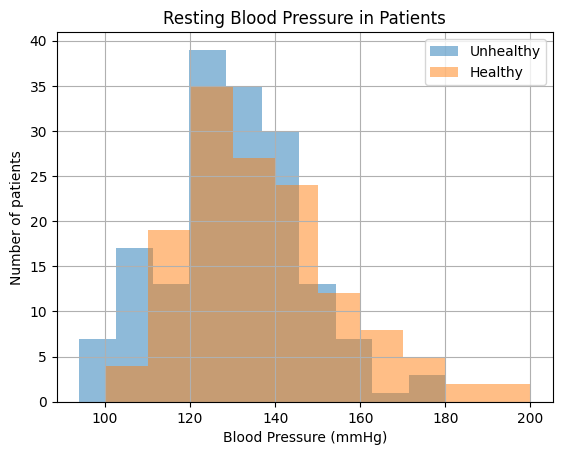

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

# Create two dataframes to compare
diseaseDF = pd.read_csv("cleanedData.csv")
diseaseDF = diseaseDF[diseaseDF.target == 1]

healthyDF = pd.read_csv("cleanedData.csv")
healthyDF = healthyDF[healthyDF.target == 0]

diseaseDF["trestbps"].hist(alpha=0.5)
healthyDF["trestbps"].hist(alpha=0.5)
plt.title("Resting Blood Pressure in Patients")
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Number of patients")
plt.legend(["Unhealthy","Healthy"])

Blood pressure appears follow a normal distribution. The distribution of unhealthy patients have a higher mean than healthy patients. - Winter

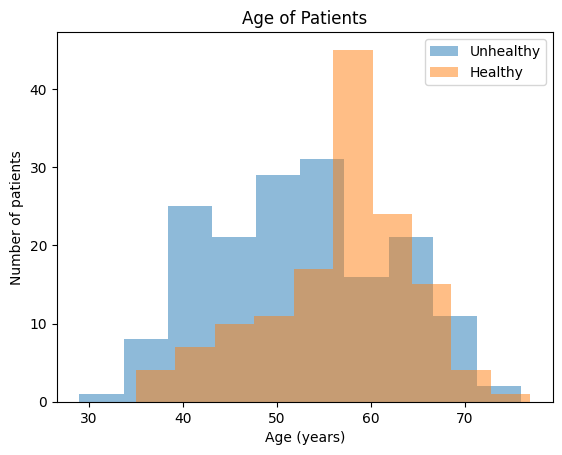

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

# Create two dataframes to compare
diseaseDF = pd.read_csv("cleanedData.csv")
diseaseDF = diseaseDF[diseaseDF.target == 1]

healthyDF = pd.read_csv("cleanedData.csv")
healthyDF = healthyDF[healthyDF.target == 0]

diseaseDF["age"].plot.hist(alpha=0.5)
plt.title("Age of Patients")
healthyDF["age"].plot.hist(alpha=0.5)
plt.xlabel("Age (years)")
plt.ylabel("Number of patients")
plt.legend(["Unhealthy","Healthy"])

Healthy patients appear to have a higher mean age than unhealthy patients and a smaller standard deviation. Possibly because you are more likely to be screened for heart disease if you are old or already exhibit symptoms. - Winter

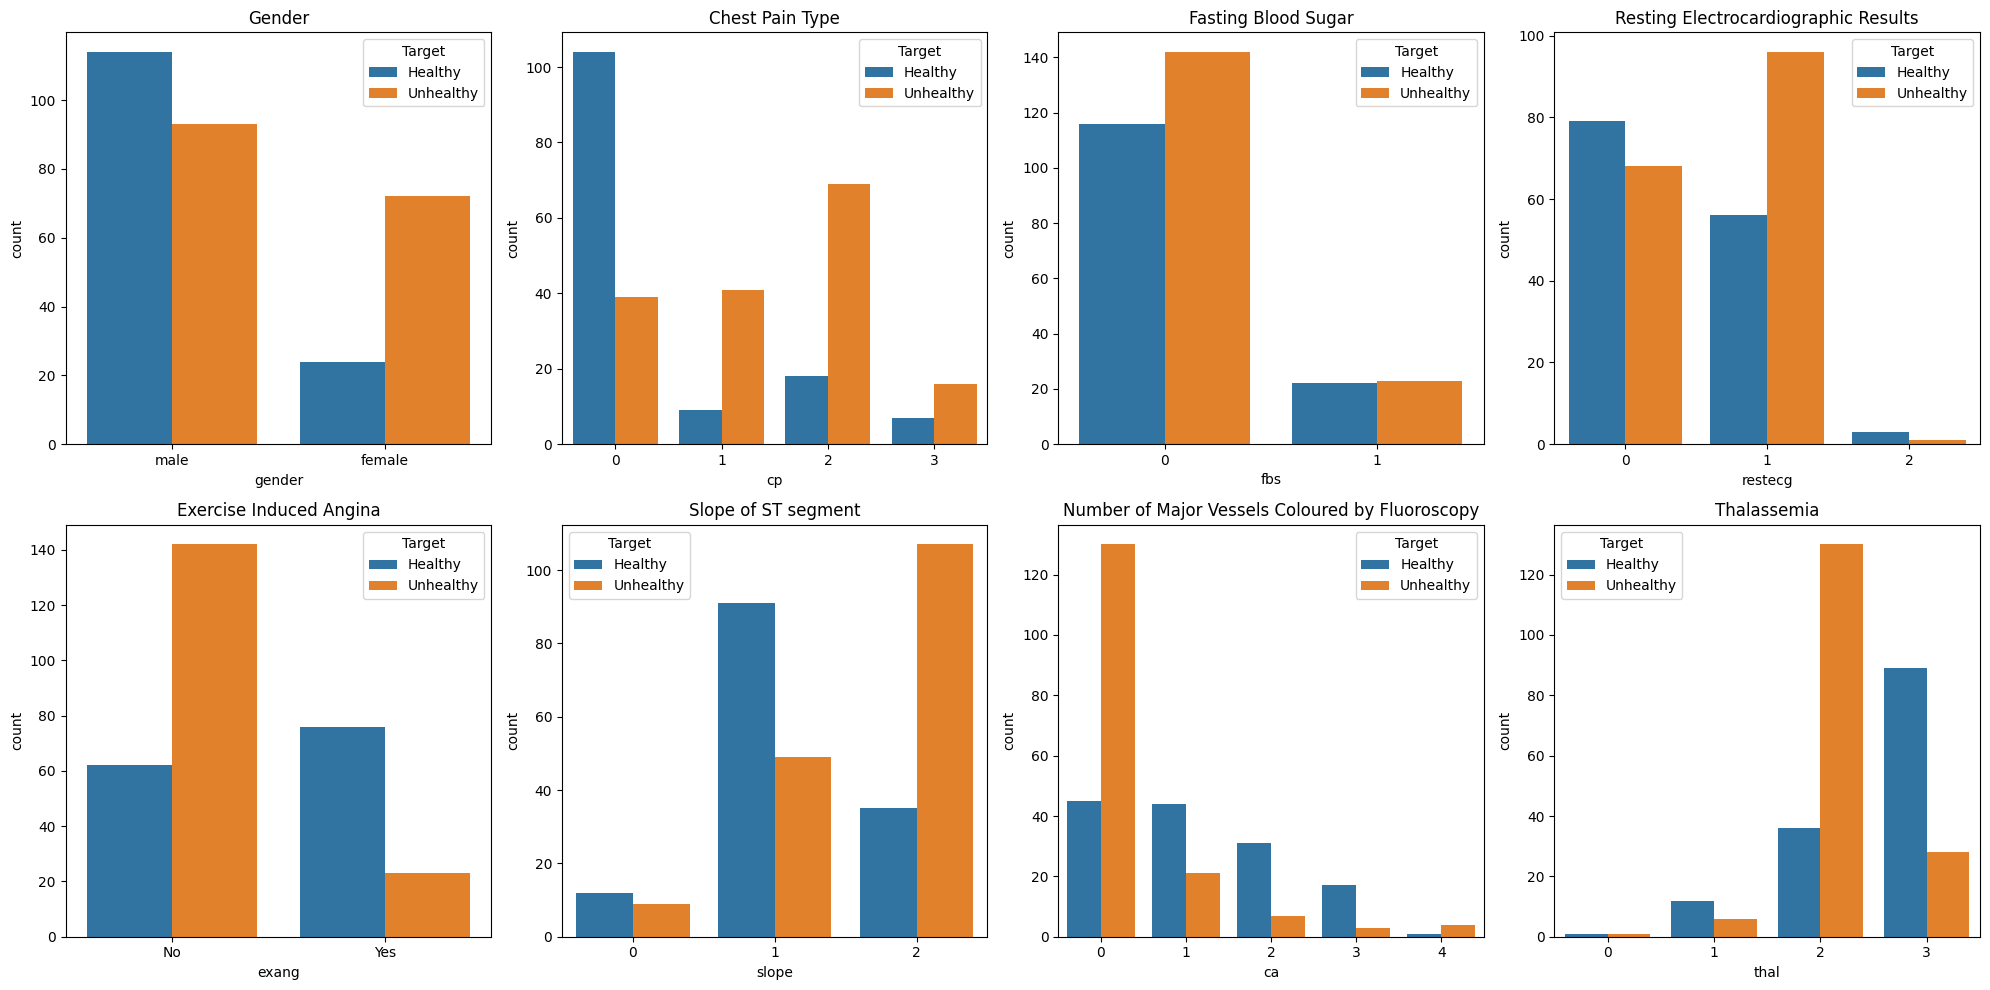

In [ ]:
#Alex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
df = pd.read_csv("/content/cleanedData.csv")
#number of data points for each feature, seperated by whether data point has heart disease or not
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10)) # Removed subplot_titles

cat_feat = ['gender', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Define an appropriate list of titles for each subplot
plot_titles = ["Gender","Chest Pain Type", "Fasting Blood Sugar","Resting Electrocardiographic Results","Exercise Induced Angina","Slope of ST segment","Number of Major Vessels Coloured by Fluoroscopy","Thalassemia"]

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/4), idx%4]
    sns.countplot(x=feature, hue='target', data=df, ax=ax)
    ax.set_title(plot_titles[idx]) # Set individual title for each subplot

    # Customize the legend labels for each subplot
    handles, labels = ax.get_legend_handles_labels()
    new_labels = []
    for label in labels:
        if label == '0':
            new_labels.append('Healthy')
        elif label == '1':
            new_labels.append('Unhealthy')
        else:
            new_labels.append(label)

    ax.legend(handles, new_labels, title="Target") # Apply custom legend labels

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels

The above diagram shows graphs representing the categorial features of the dataset using bar charts.

Chest pain: the heart desease diagnosis is greater among the patients that feel any chest pain.

Restegc - Eletrocardiagraph results: the rate of heart desease diagnoses higher for patients with a ST-T wabe abnormality .

Slope: The ratio of patients diagnosed with heart desease is higher for slope = 2

Ca: The diagonosed ratio decreases fo ca between 1 and 3.

Thal: the diagnosed ratio is higher for thal = 2.




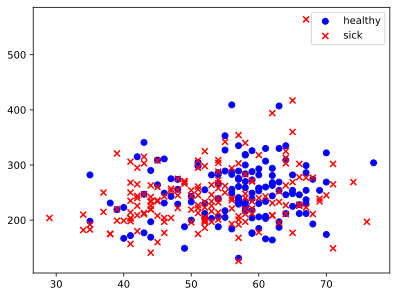

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

plt.figure()
plt.scatter(df[df['target'] == 0]['age'], df[df['target'] == 0]['chol'], marker='o', c='blue', label='healthy')
plt.scatter(df[df['target'] == 1]['age'], df[df['target'] == 1]['chol'], marker='x', c='red', label='sick')

plt.legend()

This scatter diagram shows age(25-80) x-axis in relation to cholestero levels(200-500) y-axis. It also shows which of the units are sick or healthy. From this we can see that there is a weak positive correlation. (Valentin)

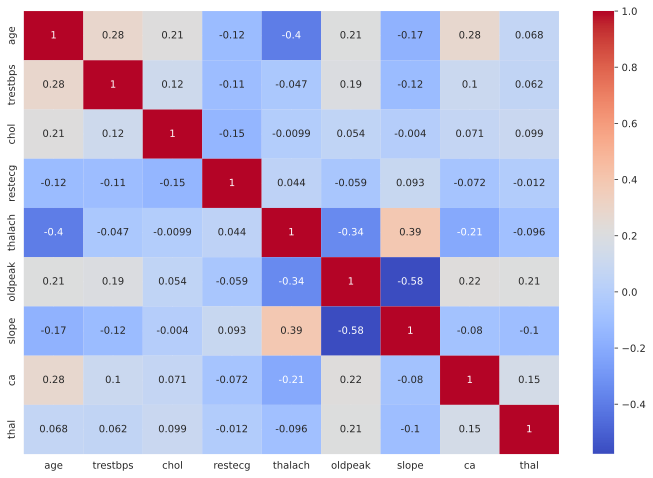

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

plt.rcParams['figure.figsize']= (12,8) # figure size
sns.set_style('darkgrid') # Style

plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['target', 'gender', 'cp', 'fbs', 'exang'], axis=1).corr(), annot=True, cmap='coolwarm');


This heatmap shows the correlation (PMCC) between different factors (-1= perfect negative correlation, 1=perfect positive, 0=no correlation). The factors with the highest correlation here are oldpeak and slope.(Valentin)

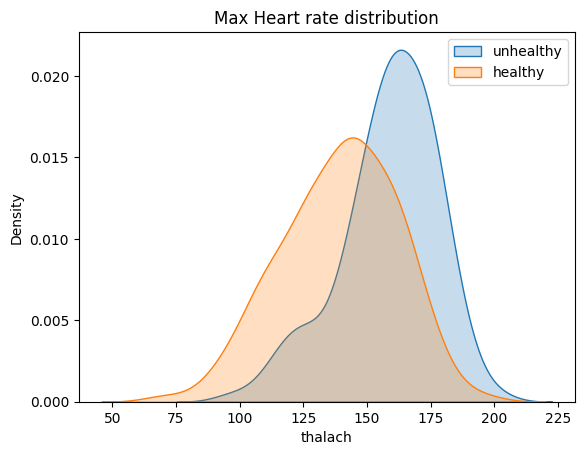

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

heart_data = pd.read_csv("/content/cleanedData.csv")
# check heart rate values of patients who are sick
sns.kdeplot(heart_data[heart_data.target == 1].thalach, fill= True, label =  'unhealthy')
# check heart rate values of patients who are healthy
sns.kdeplot(heart_data[heart_data.target == 0].thalach, fill= True, label =  'healthy')
# apply descriptions
plt.legend(["unhealthy", "healthy"])
plt.title("Max Heart rate distribution")
plt.show()

Diagram above shows the max heart distribution of patients who are healthy and  unhealthy. Healthy patients tend to have a lower maximum heart rate with the distribution peak at around the 125-150 range whereas patients detected with heart disease are shown to have a much higher maximum heart rate with the peak being around 150-175 - Monica

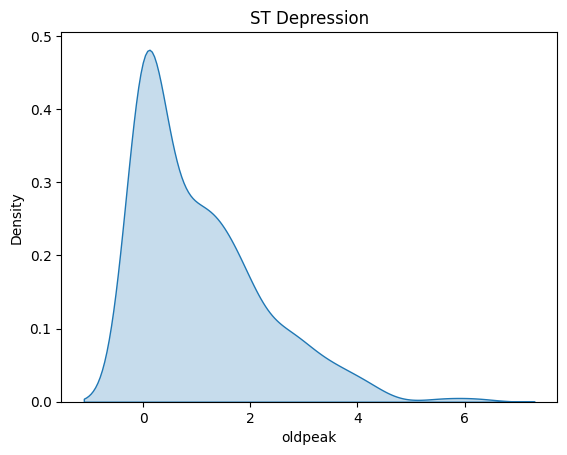

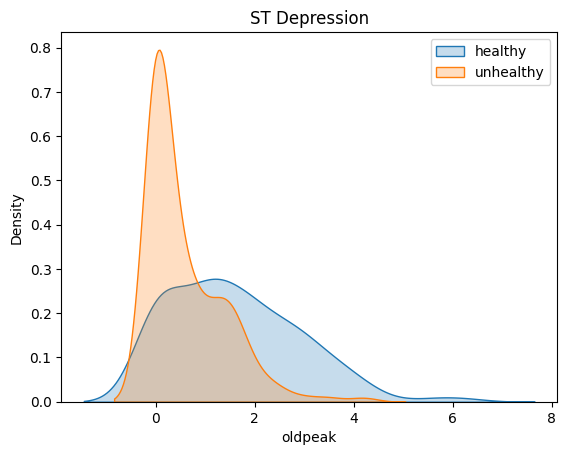

In [ ]:
sns.kdeplot(heart_data.oldpeak, fill= True, label =  'unhealthy')
plt.title("ST Depression")
plt.show()

sns.kdeplot(heart_data[heart_data.target == 0].oldpeak, fill= True, label =  'healthy')
sns.kdeplot(heart_data[heart_data.target == 1].oldpeak, fill= True, label =  'unhealthy')
plt.legend(["healthy", "unhealthy"])
plt.title("ST Depression")
plt.show()

First diagram provides a general overview of the oldpeak variable which shows the extent of ST depression through exercise in comparison to rest. The peak at 0 shows there is a higher amount of patients who have reported around or near 0 ST depression. By seperating the variable by healthy and unhealthy targets in second density plot we can see range of values of ST depression where patients have been detected with heart disease against those who are healthy - Monica

fatal: destination path 'heart_data' already exists and is not an empty directory.


/tmp/ipython-input-966876788.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x= feature, data = heart_data, palette= "viridis")
/tmp/ipython-input-966876788.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x= feature, data = heart_data, palette= "viridis")
/tmp/ipython-input-966876788.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x= feature, data = heart_data, palette= "viridis")
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 14.2% of the points cannot be placed; you may want to decrea

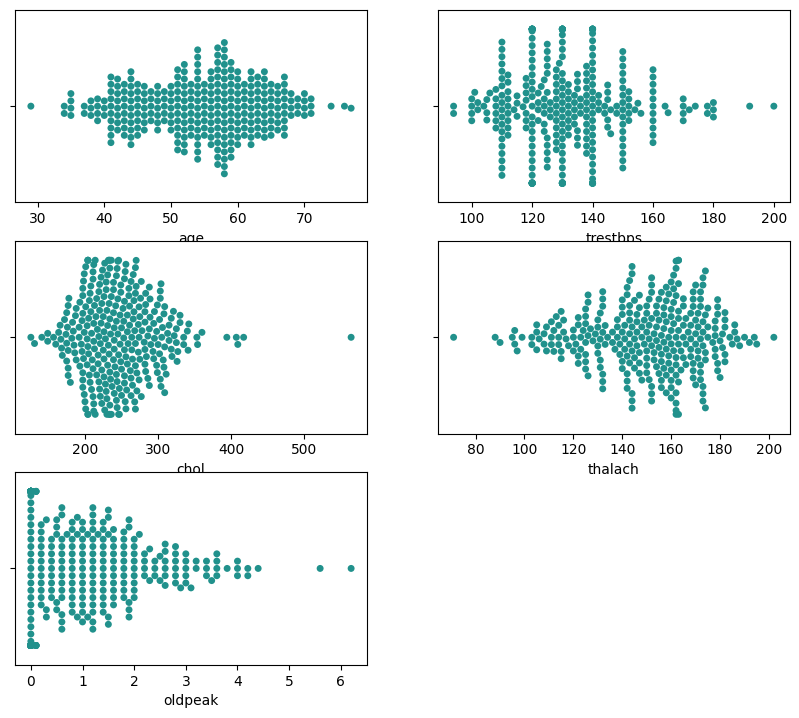

In [ ]:
!git clone https://github.com/mf25266/heart_data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csvco("/ntent/heart_data/clean_heart_data.csv")

numerical_data = heart_data[["age", "trestbps", "chol", "thalach", "oldpeak"]]

plt.figure(figsize= (10,len(numerical_data)*3))

for i, col in enumerate(numerical_data,1):
  plt.subplot(len(numerical_data), 2, i)
  sns.swarmplot(x= col, data = heart_data, palette= "viridis")

Graph shows the swarm plot of numerical features in the dataset which helps to spot for outliers which are values that are significantly different from other values in the same column, and see where the data is most concetrated for each feature . There seems to be an insignficant amount of only 1-2 per feature. This could also be a very normal variation of the dataset.  - Monica

<Figure size 300x300 with 0 Axes>

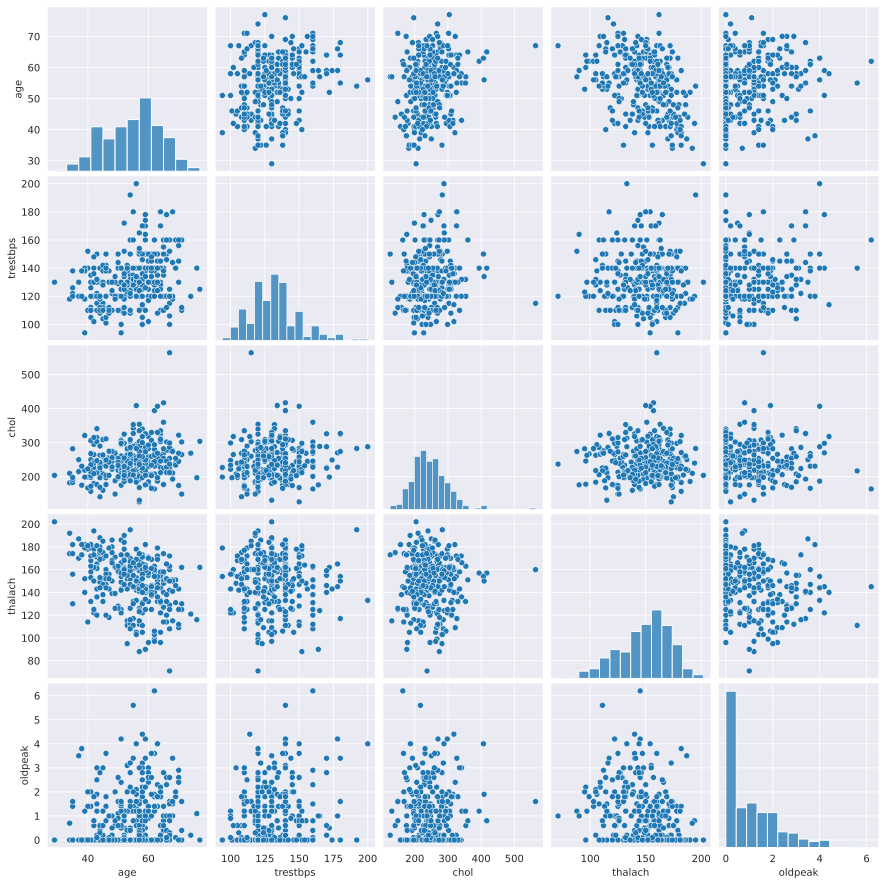

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

heart_data = pd.read_csv("/content/heart_data/clean_heart_data.csv")

num_cont_feat = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(3,3))
sns.set_style('darkgrid')
sns.pairplot(heart_data[num_cont_feat])

This scatter plot matrix shows that older patients usually have lower maximum heart rates, while the high cholesterol and resting blood pressure often overlap with each other, which alludes to the combined effects and risk factors of heart disease being another factor to consider. -Daniel


Text(0.5, 1.0, 'Distribution of Cholesterol by Sex')

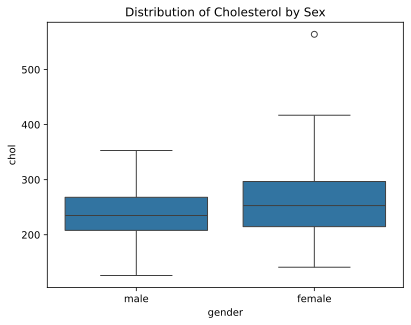

In [ ]:
sns.boxplot(x='gender', y='chol', data=df)
plt.title("Distribution of Cholesterol by Sex")


The box plot above shows the distribution of colesterol in mg/dl between the sexes in this dataset. This plot shows that female patients have a wider spread and higher median than males, however there is overlap between the sexes meaning that the differences aren't as significant. - Delyth

/tmp/ipython-input-848648673.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


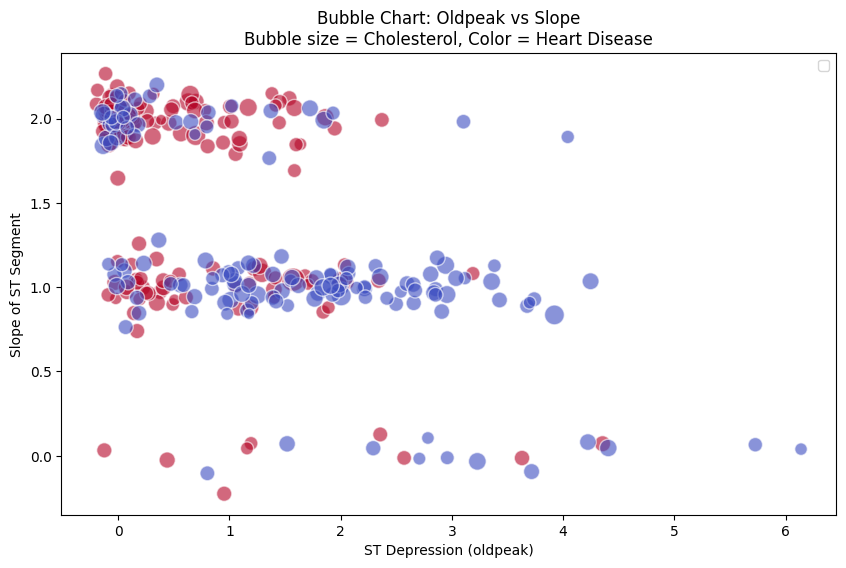

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("/content/heart_data.csv")

#spread the bubbles to make it easier to read
x_jittered = df['oldpeak'] + np.random.normal(0, 0.1, size=len(df)) #(mean,spread,amount)
y_jittered = df['slope'] + np.random.normal(0, 0.1, size=len(df))

plt.figure(figsize=(10,6))
plt.scatter(
    x_jittered,
    y_jittered,
    s=df['chol'] / 2, #bubble size, halved as bubbles are too large
    c=df['target'], #change color based on value of target
    cmap='coolwarm', #color hue for bubbles 1=red, 0=blue
    alpha=0.6, #transparency
    edgecolors='w' #bubble outline color
)

plt.xlabel("ST Depression (oldpeak)")
plt.ylabel("Slope of ST Segment")
plt.title("Bubble Chart: Oldpeak vs Slope\nBubble size = Cholesterol, Color = Heart Disease")
plt.legend(["Unhealthy","Healthy"])
plt.show()

The bubble plot shows that the indiviuals with heart disease (red bubbles) usually display higher oldpeak values and flatter or downslopping ST segments (slope). Whereas those without heart disease (Blue bubbles) tend to have lower old peaks and upsloping ST segments. Also the cholesterol levels for both healthy and unhealthy people are largely varied showing less visual correlation to having heart disease.
-Jack